In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
#Importing the dataset
white_wine_data=pd.read_csv('wine+quality/winequality-white.csv',sep=';')
red_wine_data=pd.read_csv('wine+quality/winequality-red.csv',sep=';')

print(white_wine_data.shape)
print(red_wine_data.shape)

(4898, 12)
(1599, 12)


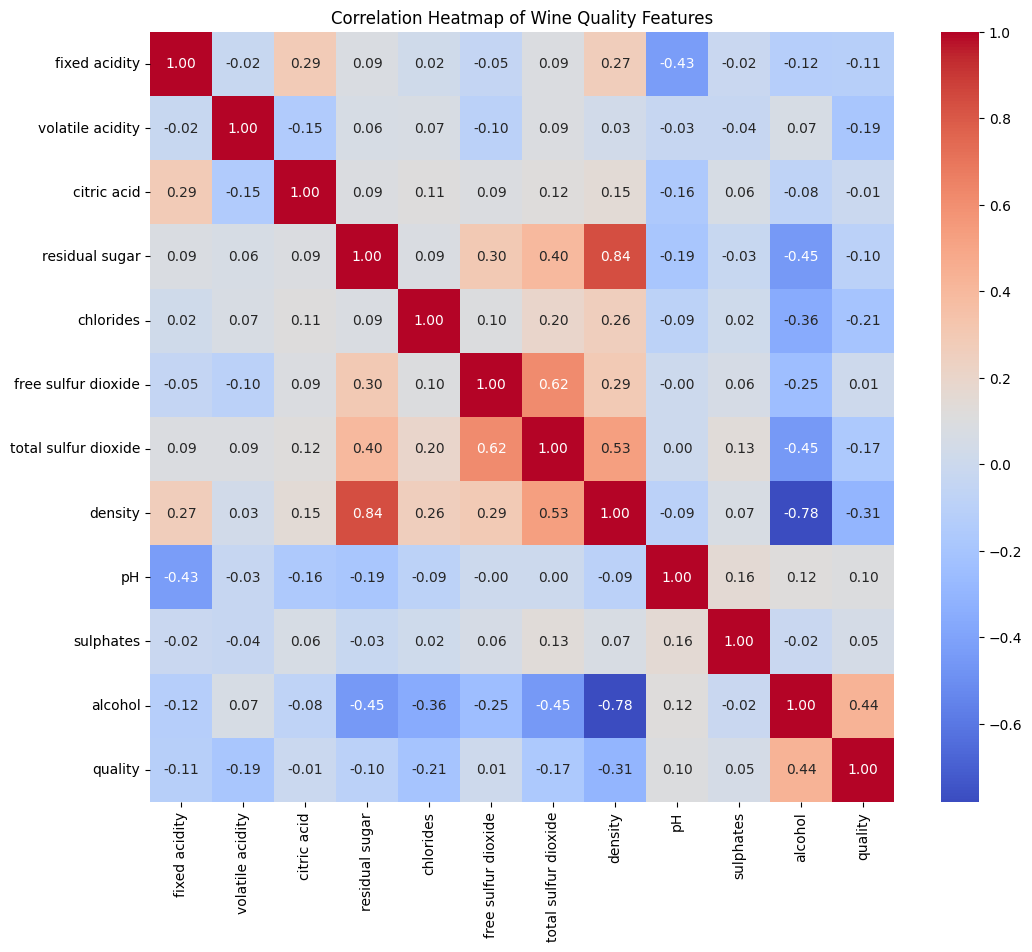

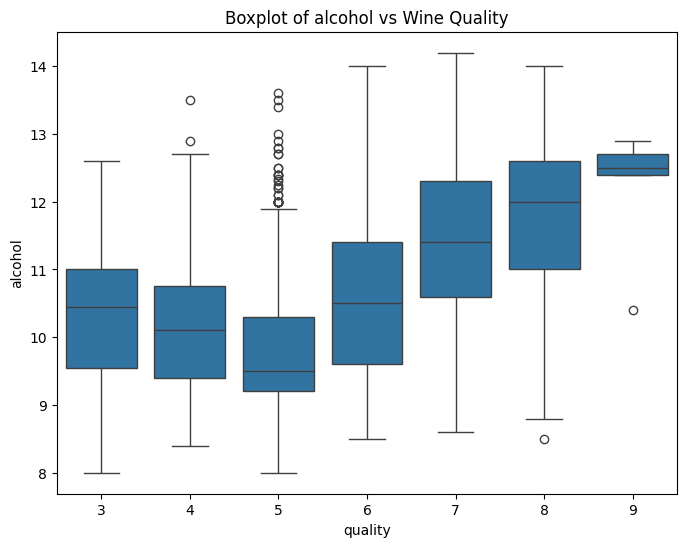

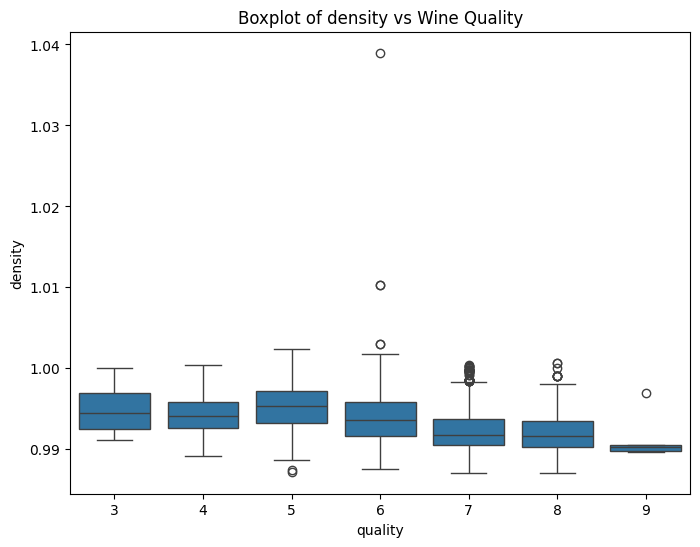

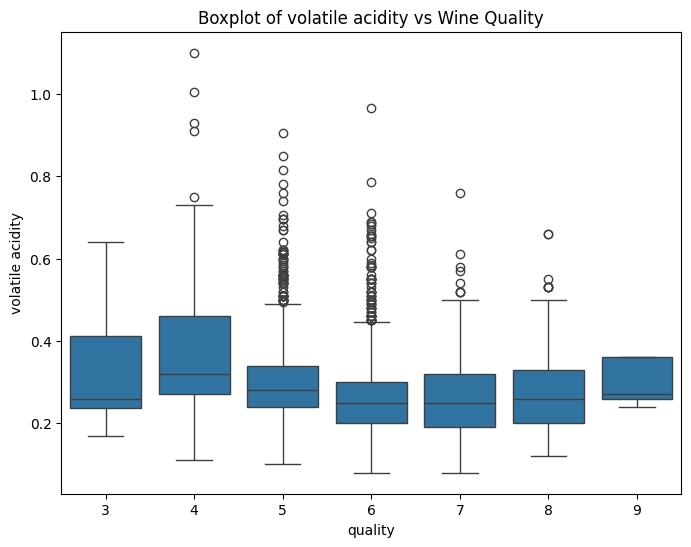

In [15]:
##Question 3

#calculate correlations
correlation_matrix = white_wine_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()

# Selecting features with higher correlation for boxplot visualization
# Based on the heatmap, we might select alcohol, density, and volatile acidity for a closer look
features_to_plot = ['alcohol', 'density', 'volatile acidity']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=white_wine_data)
    plt.title(f'Boxplot of {feature} vs Wine Quality')
    plt.show()



In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

##EXO 5

# Split the dataset into features (X) and target variable (y)
X = white_wine_data.drop('quality', axis=1)
y = white_wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest regressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("\nFeature Importances:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")



Mean Squared Error (MSE): 0.3487959183673469
Mean Absolute Error (MAE): 0.41951020408163264
R-squared Score: 0.5496345811530995

Feature Importances:
alcohol: 0.24262606717922647
volatile acidity: 0.1237315097820109
free sulfur dioxide: 0.11678697623311392
pH: 0.07011313328998724
residual sugar: 0.0690581732714154
total sulfur dioxide: 0.06766555819844386
chlorides: 0.06478044655981707
sulphates: 0.06207872288265375
density: 0.06189311466804523
citric acid: 0.060725163929090095
fixed acidity: 0.06054113400619609


In [16]:
from sklearn.model_selection import GridSearchCV

# Let's try using hyperparameters to improve the model
param_grid_forest = {'max_depth': [None,5, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid_forest, cv=3)
grid_search_forest.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = grid_search_forest.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE) with hyperparameters: ", mse)
print("Mean Absolute Error (MAE): with hyperparameters: ", mae)
print("R-squared Score using hyperparameters: ", r2)

# Get feature importances
feature_importances = grid_search_forest.best_estimator_.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("\nFeature Importances:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")

Mean Squared Error (MSE) with hyperparameters:  0.3464441836734694
Mean Absolute Error (MAE): with hyperparameters:  0.41968367346938773
R-squared Score using hyperparameters:  0.5526711418599524

Feature Importances:
alcohol: 0.23995313386483053
volatile acidity: 0.12559266459978663
free sulfur dioxide: 0.12022523703135198
residual sugar: 0.06954147253478177
pH: 0.06945166897424115
total sulfur dioxide: 0.06866516541659927
density: 0.06289122850832805
sulphates: 0.06180363084582975
fixed acidity: 0.061054306056288976
chlorides: 0.060682364076611865
citric acid: 0.06013912809135011


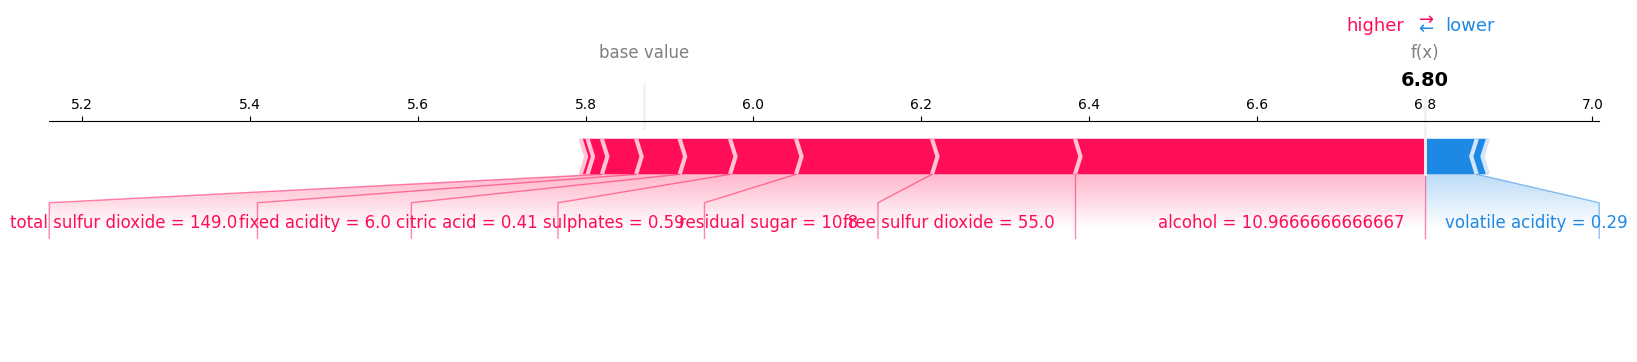

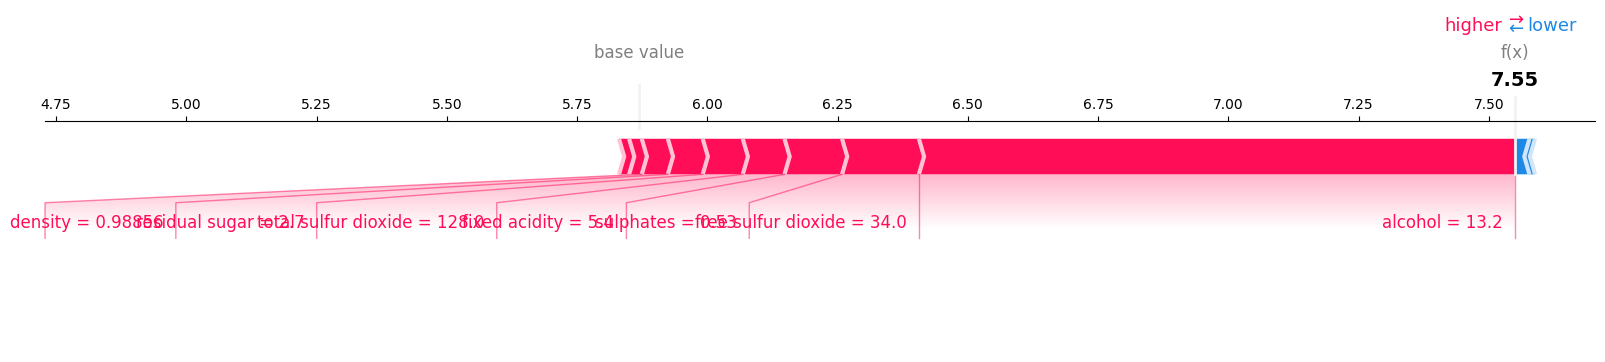

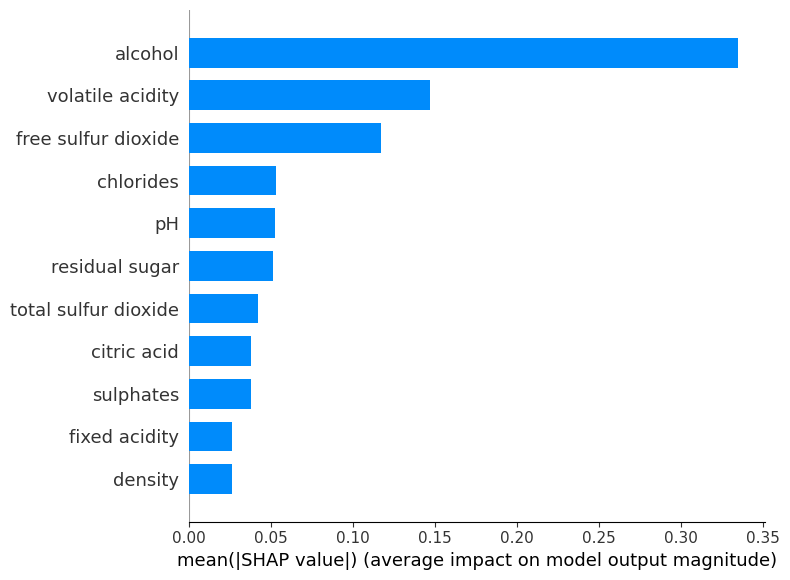

In [17]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:], matplotlib=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


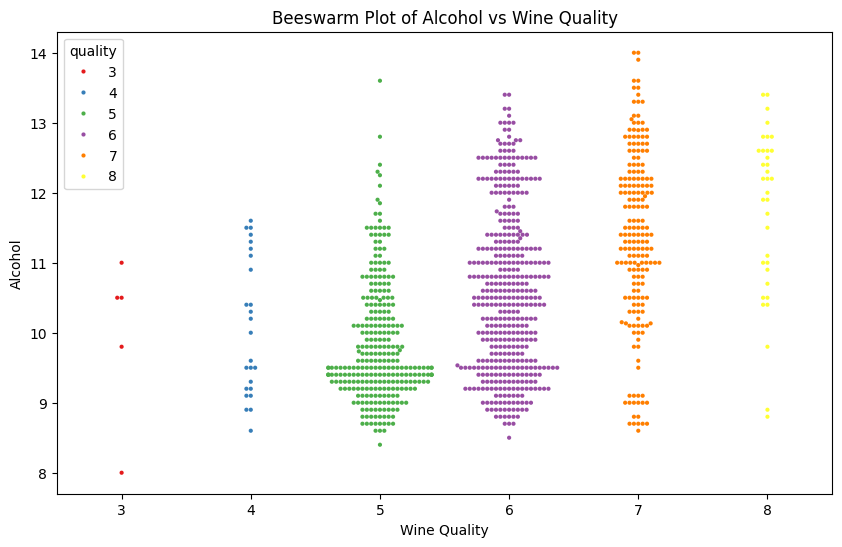

6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


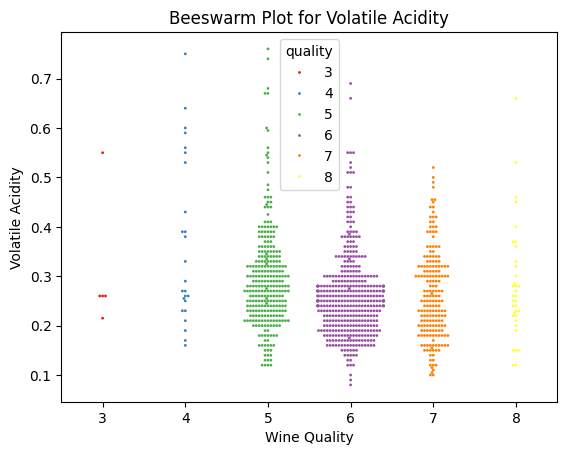

15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


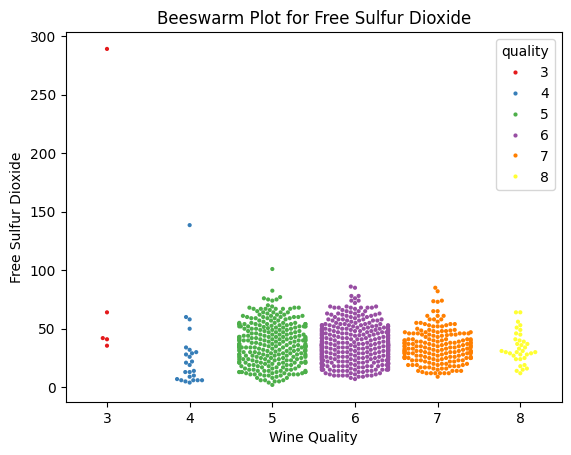

In [23]:
import seaborn as sns

# Create a dataframe with the most important variables
important_variables = X_test.iloc[:, sorted_indices[:3]]
# Add the target variable to the dataframe
important_variables['quality'] = y_test

# Plot the beeswarm plot
plt.figure(figsize=(10, 6))

# Beeswarm plot for alcohol
sns.swarmplot(data=important_variables, x='quality', y='alcohol', size=3, hue='quality', palette='Set1')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.title('Beeswarm Plot of Alcohol vs Wine Quality')
plt.show()

# Beeswarm plot for volatile acidity
sns.swarmplot(x='quality', y='volatile acidity', data=important_variables, size=2, hue='quality', palette='Set1')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.title('Beeswarm Plot for Volatile Acidity')
plt.show()

# Beeswarm plot for Free sulfur dioxide
sns.swarmplot(x='quality', y='free sulfur dioxide', data=important_variables, size=3, hue='quality', palette='Set1')
plt.xlabel('Wine Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Beeswarm Plot for Free Sulfur Dioxide')
plt.show()


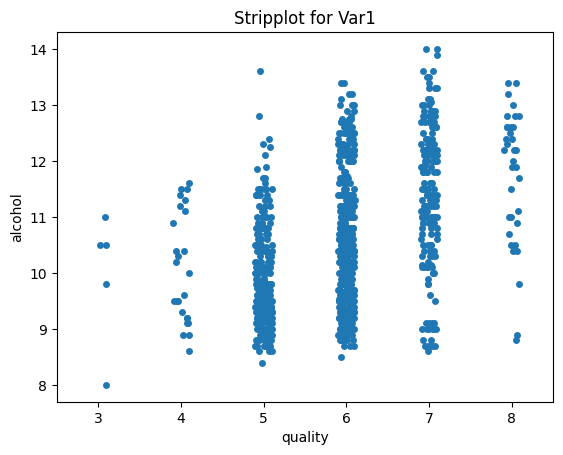

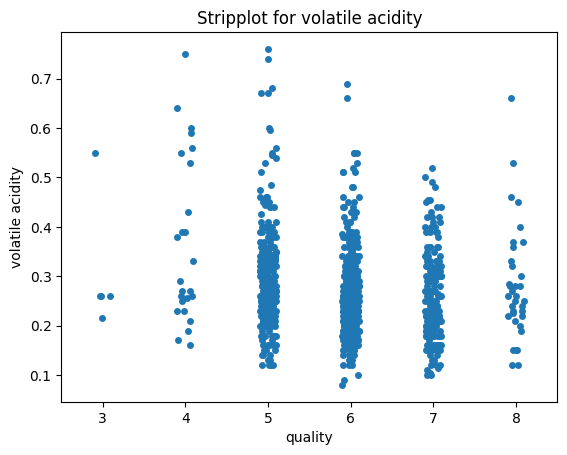

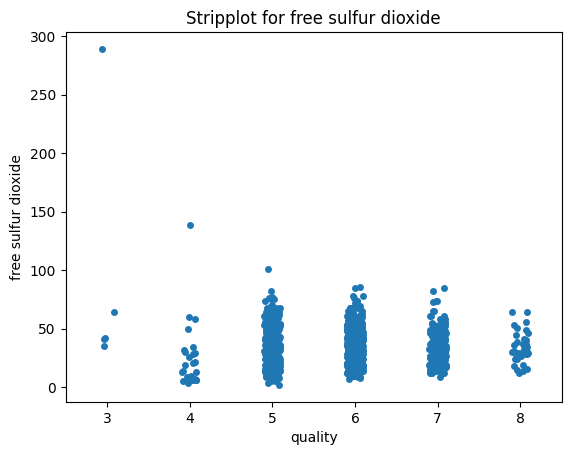

In [22]:
#make stripplot that are more lisible
sns.stripplot(x='quality', y='alcohol', data=important_variables)
plt.title('Stripplot for Var1')
plt.show()

sns.stripplot(x='quality', y='volatile acidity', data=important_variables)
plt.title('Stripplot for volatile acidity')
plt.show()

sns.stripplot(x='quality', y='free sulfur dioxide', data=important_variables)
plt.title('Stripplot for free sulfur dioxide')
plt.show()


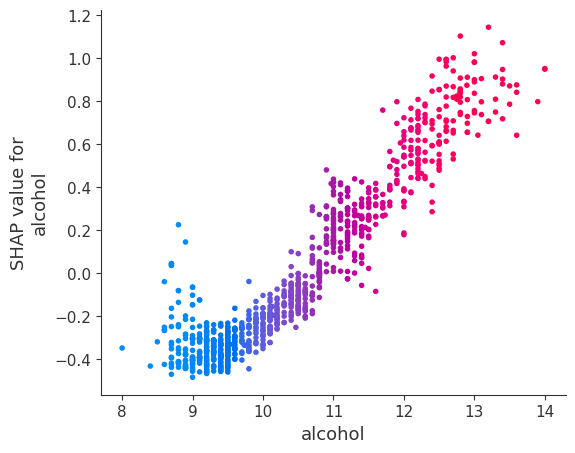

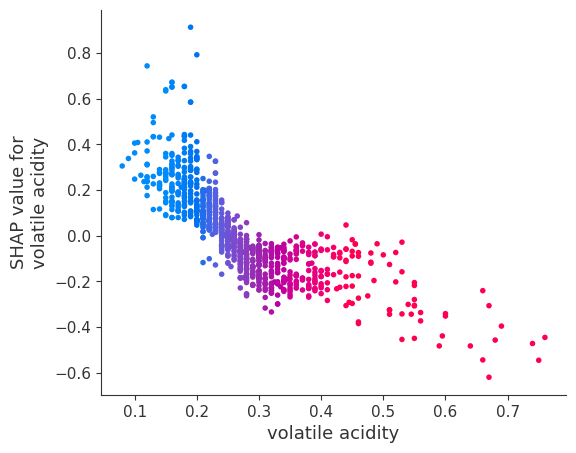

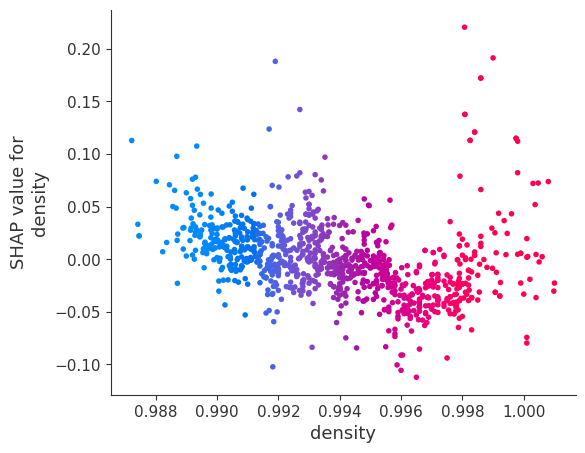

In [19]:
shap.dependence_plot(ind='alcohol', interaction_index='alcohol', shap_values=shap_values, features=X_test, display_features=X_test)
shap.dependence_plot(ind='volatile acidity', interaction_index='volatile acidity', shap_values=shap_values, features=X_test, display_features=X_test)
shap.dependence_plot(ind='density', interaction_index='density', shap_values=shap_values, features=X_test, display_features=X_test)
